In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import math

#Plots 
import matplotlib.pyplot as plt

#stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
import yfinance as yf

In [6]:
#dis= yf.Ticker("DIS")
dis= yf.download(tickers = "DIS",  # list of tickers
            period = "3y",         # time period
            interval = "1d",       # trading interval
            prepost = False,       # download pre/post market hours data?
            repair = True)

[*********************100%***********************]  1 of 1 completed


In [7]:
dis

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-13,104.500000,104.540001,101.599998,102.919998,102.919998,21085800
2020-05-14,101.980003,105.919998,99.660004,105.910004,105.910004,22002200
2020-05-15,104.980003,109.379997,104.269997,109.050003,109.050003,29766000
2020-05-18,114.470001,119.779999,114.470001,116.849998,116.849998,40044600
2020-05-19,115.099998,116.470001,113.419998,114.370003,114.370003,20332600
...,...,...,...,...,...,...
2023-05-08,101.699997,103.910004,101.690002,102.970001,102.970001,10810100
2023-05-09,102.910004,102.980003,102.089996,102.180000,102.180000,6829900
2023-05-10,103.000000,103.250000,100.040001,101.139999,101.139999,19525200


In [8]:
#dis['Close'] = dis['Close'].astype(int)

In [9]:
DIS= dis[["Close"]]
DIS.index.frequency = 'D'
DIS
data= DIS.values

In [10]:
DIS.set_index("Close")
DIS.index = pd.to_datetime(DIS.index)

<AxesSubplot:xlabel='Date'>

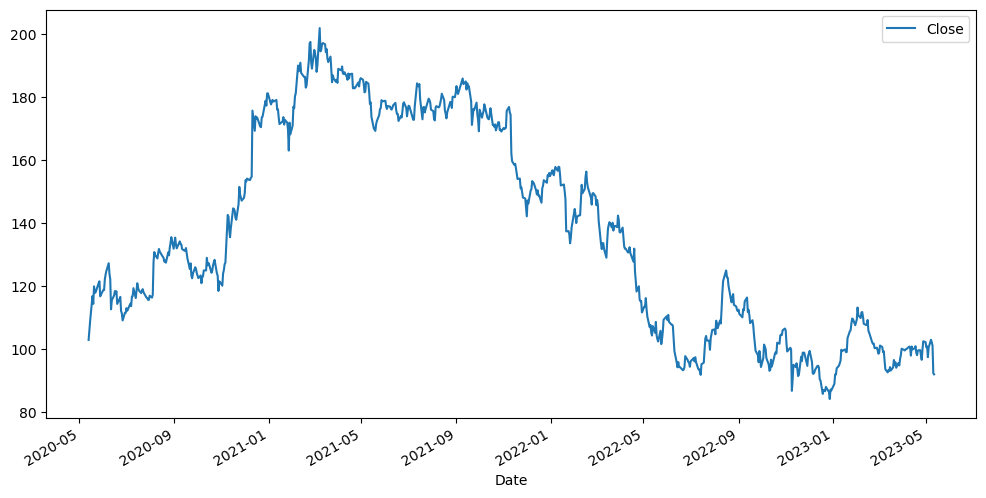

In [11]:
DIS.plot(figsize=(12,6))

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

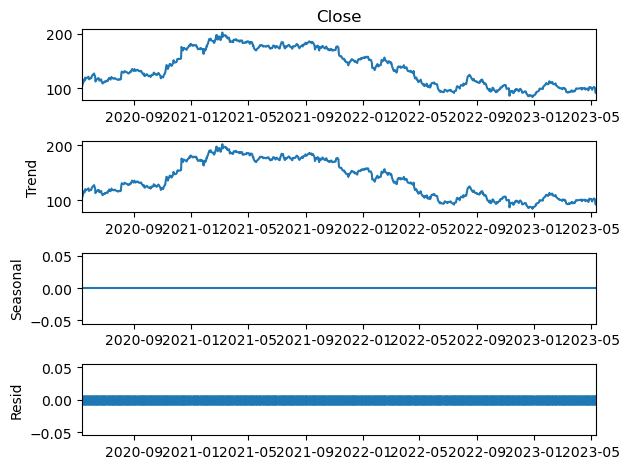

In [13]:
results = seasonal_decompose (DIS["Close"], period= 1)
results.plot();

In [14]:
len(DIS)

756

# data preprocessing

In [15]:
#train = DIS.iloc[:755]
#test = DIS.iloc[755:]

In [16]:
train_data_len = math.ceil(len(DIS)*.8)

train_data_len

605

In [17]:
from sklearn.preprocessing import MinMaxScaler 

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(DIS)

scaled_data

array([[0.15924919],
       [0.18464417],
       [0.21131309],
       [0.27756072],
       [0.25649739],
       [0.30363511],
       [0.28588417],
       [0.28749785],
       [0.31238319],
       [0.31730932],
       [0.2767114 ],
       [0.28138274],
       [0.29386782],
       [0.29369798],
       [0.32282997],
       [0.33565485],
       [0.34525225],
       [0.36614573],
       [0.33735349],
       [0.32282997],
       [0.24180397],
       [0.26600984],
       [0.2795142 ],
       [0.29106508],
       [0.28435537],
       [0.29047055],
       [0.25632749],
       [0.26966195],
       [0.27535244],
       [0.2369628 ],
       [0.23093257],
       [0.21173772],
       [0.23229147],
       [0.23220658],
       [0.24494651],
       [0.23789707],
       [0.25700697],
       [0.25021231],
       [0.27594704],
       [0.27722098],
       [0.29870899],
       [0.27220997],
       [0.29293362],
       [0.31195857],
       [0.29947342],
       [0.29284866],
       [0.28554443],
       [0.292

In [19]:
train_data = scaled_data[0:train_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.15924919, 0.18464417, 0.21131309, 0.27756072, 0.25649739,
       0.30363511, 0.28588417, 0.28749785, 0.31238319, 0.31730932,
       0.2767114 , 0.28138274, 0.29386782, 0.29369798, 0.32282997,
       0.33565485, 0.34525225, 0.36614573, 0.33735349, 0.32282997,
       0.24180397, 0.26600984, 0.2795142 , 0.29106508, 0.28435537,
       0.29047055, 0.25632749, 0.26966195, 0.27535244, 0.2369628 ,
       0.23093257, 0.21173772, 0.23229147, 0.23220658, 0.24494651,
       0.23789707, 0.25700697, 0.25021231, 0.27594704, 0.27722098,
       0.29870899, 0.27220997, 0.29293362, 0.31195857, 0.29947342,
       0.29284866, 0.28554443, 0.29259388, 0.29607609, 0.28834723,
       0.28401564, 0.27297433, 0.27187023, 0.26702906, 0.26745375,
       0.27832515, 0.27331407, 0.28129778, 0.36894853, 0.39621205])]
[0.3886528993706624]



In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(545, 60, 1)

# model train

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, batch_size=1,epochs=3 )

Epoch 1/3
545/545 [==============================] - 42s 63ms/step - loss: 0.0070
Epoch 2/3
545/545 [==============================] - 33s 61ms/step - loss: 0.0031
Epoch 3/3
545/545 [==============================] - 33s 61ms/step - loss: 0.0021


# test/ validate 

In [26]:
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = data[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [28]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

5/5 [==============================] - 3s 46ms/step


In [29]:
rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.20886124364587644

# graphs

C:\Users\ellen\AppData\Local\Temp\ipykernel_2460\204670603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


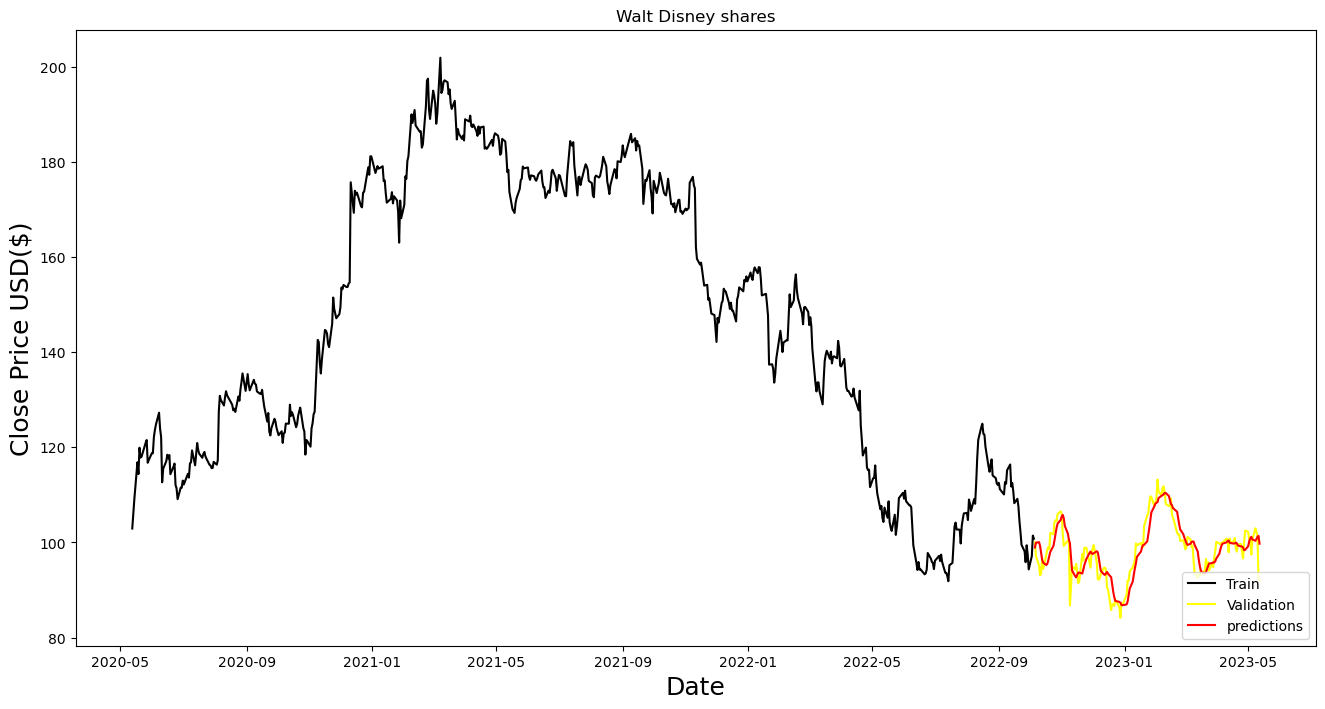

In [33]:
train=DIS[:train_data_len]
valid=DIS[train_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Walt Disney shares')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='black')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='red')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.show()

In [35]:
valid.tail()

,Close,predictions
Date,,
2023-05-08,102.970001,100.348480
2023-05-09,102.180000,100.711609
2023-05-10,101.139999,101.171669
2023-05-11,92.309998,101.387451
2023-05-12,91.989998,99.737183


In [36]:
DIS

,Close
Date,
2020-05-13,102.919998
2020-05-14,105.910004
2020-05-15,109.050003
2020-05-18,116.849998
2020-05-19,114.370003
...,...
2023-05-08,102.970001
2023-05-09,102.180000
2023-05-10,101.139999


# Tomorrow predictions

In [41]:
tmr_pred= DIS[-60:].values
tmr_pred=scaler.transform(tmr_pred)

X_test=[]
X_test.append(tmr_pred)
X_test=np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(f'Walt Disney Stock price tomorrow:{pred_price}')

1/1 [==============================] - 0s 78ms/step
Walt Disney Stock price tomorrow:[[97.4276]]


C:\Users\ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
pip install keras